In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=columns)
print(df.shape)
user_item_matrix = df.pivot(index='user_id', columns='movie_id', values='rating')

(100000, 4)


In [4]:
num_users = user_item_matrix.shape[0]
num_items = user_item_matrix.shape[1]
num_ratings = df.shape[0]
sparsity = 1 - (num_ratings / (num_users * num_items))

print(f'Number of users: {num_users}')
print(f'Number of items: {num_items}')
print(f'Number of ratings: {num_ratings}')
print(f'Sparsity: {sparsity:.4f}')

Number of users: 943
Number of items: 1682
Number of ratings: 100000
Sparsity: 0.9370


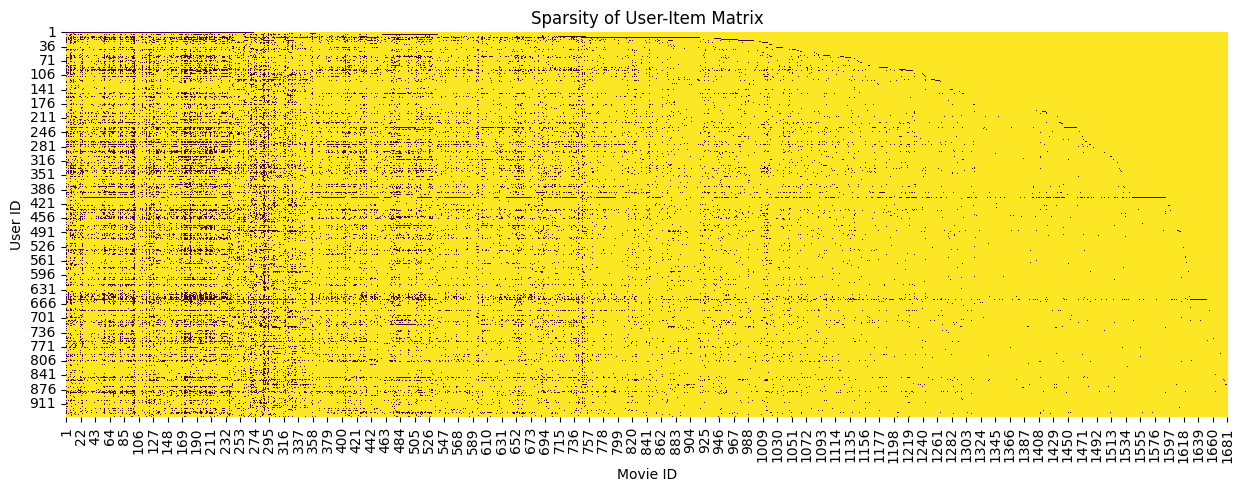

In [7]:
# We can see 93.7% of the matrix is empty, which is a common issue in collaborative filtering.
# Visualizing the sparsity can help understand the distribution of ratings.
plt.figure(figsize=(15, 5))
sns.heatmap(user_item_matrix.isnull(), cbar=False, cmap='viridis')
plt.title('Sparsity of User-Item Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

In [8]:
# Giả sử có một user mới, user_id = 9999
new_user_id = 9999

# User-Based CF sẽ thất bại vì không thể tìm thấy láng giềng
# user_id này không tồn tại trong ma trận tương đồng
print("Thử User-Based CF cho user mới:")
try:
    # Đoạn code mô phỏng từ notebook 01
    # predict_user_based(new_user_id, ...)
    print("-> Lỗi! User không tồn tại trong dữ liệu huấn luyện.")
except KeyError:
    print("-> Lỗi! User không tồn tại trong dữ liệu huấn luyện.")

# Item-Based CF cũng sẽ thất bại vì không có lịch sử rating để dựa vào
print("\nThử Item-Based CF cho user mới:")
# Hàm predict_item_based sẽ không có item nào đã được rate để tính toán
print("-> Không thể dự đoán vì không có item nào đã được user này đánh giá.")

Thử User-Based CF cho user mới:
-> Lỗi! User không tồn tại trong dữ liệu huấn luyện.

Thử Item-Based CF cho user mới:
-> Không thể dự đoán vì không có item nào đã được user này đánh giá.


In [9]:
# Giả sử có một item mới, item_id = 9999
new_item_id = 9999

# User-Based CF không thể dự đoán cho item này vì không có user nào đã rate nó
print("Thử User-Based CF cho item mới:")
print("-> Không thể dự đoán vì không có láng giềng nào đã đánh giá item này.")


# Item-Based CF sẽ thất bại vì item này không có trong ma trận tương đồng
print("\nThử Item-Based CF cho item mới:")
try:
    # Đoạn code mô phỏng từ notebook 02
    # train_item_similarity_matrix[new_item_id]
    print("-> Lỗi! Item không tồn tại trong ma trận tương đồng.")
except KeyError:
    print("-> Lỗi! Item không tồn tại trong ma trận tương đồng.")

Thử User-Based CF cho item mới:
-> Không thể dự đoán vì không có láng giềng nào đã đánh giá item này.

Thử Item-Based CF cho item mới:
-> Lỗi! Item không tồn tại trong ma trận tương đồng.


In [12]:
def suggest_for_new_user(df, n_suggestions=5):
    """Gợi ý các item phổ biến nhất cho user mới."""
    print(f"Chào mừng bạn mới! Dưới đây là {n_suggestions} phim được yêu thích nhất trên hệ thống:")
    
    # Tính rating trung bình và số lượng rating cho mỗi phim
    movie_stats = df.groupby('movie_id')['rating'].agg(['mean', 'count'])
    
    # Lọc ra các phim có ít nhất một số lượng rating nhất định để tránh các phim ít người xem
    min_ratings_count = 50
    popular_movies = movie_stats[movie_stats['count'] >= min_ratings_count]
    
    # Sắp xếp theo rating trung bình giảm dần
    top_movies = popular_movies.sort_values(by='mean', ascending=False)
    
    return top_movies.head(n_suggestions)

# Gợi ý cho một user mới
display(suggest_for_new_user(df))

Chào mừng bạn mới! Dưới đây là 5 phim được yêu thích nhất trên hệ thống:


,mean,count
movie_id,,
408,4.491071,112
318,4.466443,298
169,4.466102,118
483,4.456790,243
114,4.447761,67
